In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Estudio sobre violencia en México

Proyecto de módulo 2

In [2]:
regiones = {
'Noroeste':['Baja California','Baja California Sur','Chihuahua','Sinaloa','Sonora'],
'Noreste':['Coahuila de Zaragoza','Durango','Nuevo León','San Luis Potosí','Tamaulipas'],
'Centro':['Ciudad de México','México','Guerrero','Hidalgo','Morelos','Puebla','Tlaxcala'],
'Occidente':['Aguascalientes','Guanajuato','Colima','Jalisco','Nayarit','Michoacán de Ocampo','Querétaro','Zacatecas' ],
'Sureste':['Campeche','Chiapas','Campeche','Veracruz de Ignacio de la Llave', 'Yucatán','Tabasco','Quintana Roo' ]

}

In [3]:
# Violencia delictiva con los datos completos
class vd_tablas:
    # Tabla completa de Violencia por año
    vd_por_anio = {}
    # Tabla con la suma del total anual, suma los valores de los 12 meses
    vd_total = {}
    
    crimen_por_anio = {}
    crimen_total = {}
    
    anios = []
    meses = []

    def __init__(self,list_crimenes):
        self.meses = ['Enero' ,'Febrero','Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
        self.anios = ['2015','2016', '2017', '2018', '2019', '2020']
        self.list_crimenes= list_crimenes

    # Leer el csv y convertirlo a DataFrame
    def initialize(self):
        for i, anio in enumerate(self.anios):
            abs_path = f'Violencia en Mexico/Datos completos/{anio}/{anio}_datos_violencia_delictiva.csv'
            self.vd_por_anio[anio] = pd.read_csv(abs_path,encoding="UTF-8").drop(columns=['Clave_Ent', 'Cve. Municipio', 'Municipio', 'Bien jurídico afectado', 'Modalidad' ])
            for crimen in self.list_crimenes:
                abs_path = f'Violencia en Mexico/Datos por delito/{anio}/{anio}_{crimen}.csv'
                self.crimen_por_anio[anio +"_"+ crimen] = pd.read_csv(abs_path, encoding='latin-1', engine="python").drop(columns=['Clave_Ent', 'Cve. Municipio', 'Municipio', 'Bien jurídico afectado', 'Modalidad' ])

            
    def describe(self):
        self.df_mensual = pd.DataFrame(self.vd_total)
        df = self.df_mensual
        print(f"Hay {np.length(df)}")
        print(self.df_mensual.info())


In [4]:

delito=['Feminicidio']
delitos_len=len(delito)

tabla_vd = vd_tablas(delito)
tabla_vd.initialize()


meses = tabla_vd.meses
anios = tabla_vd.anios



In [10]:

por_zona = {}
tot_delitos_region = {}
delitos_entidad = {}



for anio in anios:
    delitos_anual = tabla_vd.crimen_por_anio[anio+"_Feminicidio"]
    entidad = delitos_anual.Entidad
    tot_delitos_region[anio] = {}
    print(anio)
    delitos_entidad[anio] = pd.DataFrame(delitos_anual).groupby('Entidad')
    print(len(delitos_entidad[anio]))

    for i, region in enumerate(regiones):
        feminicidio_zona = delitos_anual[entidad.isin(regiones[region])]
        por_zona[region] = feminicidio_zona[meses].sum()
        tot_delitos_region[anio][region] = np.sum(feminicidio_zona[meses].sum())


2015
32
2016
32
2017
32
2018
32
2019
32
2020
32


<AxesSubplot:>

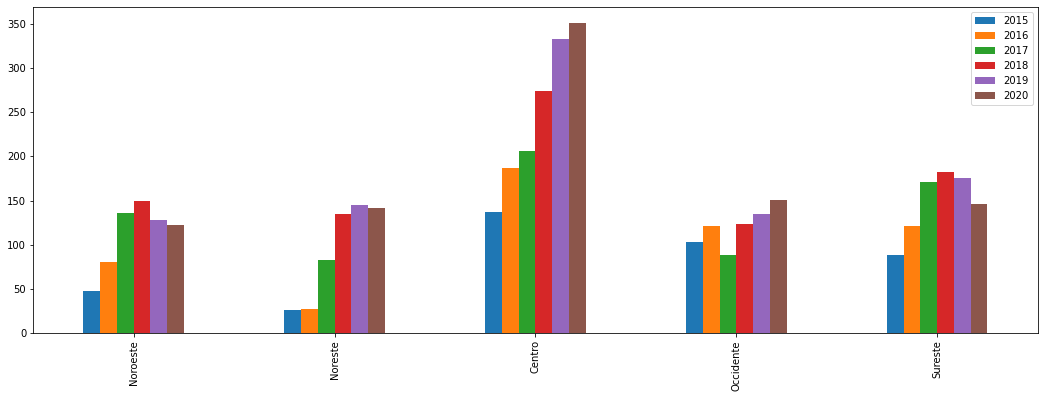

In [11]:
feminicidios = pd.DataFrame( tot_delitos_region)
feminicidios.plot.bar(figsize=(18,6))
#feminicidios.tail()

In [12]:
#display(feminicidios)
fig = px.bar(pd.DataFrame(tot_delitos_region).T, title='Tendencia de los feminicidios en México')
fig.show()

In [8]:
px.line(feminicidios.T)